# Задание 1: Определение типа шкалы измерения
Создайте список, состоящий из различных типов данных (например, возраст, пол, уровень образования, зарплата и т.д.). Затем создайте функцию на Python, которая будет проходить через каждый элемент этого списка и определять тип шкалы измерения (номинальная, порядковая, интервальная, отношения).

In [3]:
data_list = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

def determine_scale(data):
    scales = {
        'Survived': 'номинальная',
        'Pclass': 'порядковая',
        'Name': 'номинальная',
        'Sex': 'номинальная',
        'Age': 'интервальная',
        'SibSp': 'шкала отношений',
        'Parch': 'шкала отношений',
        'Ticket': 'номинальная',
        'Fare': 'шкала отношений',
        'Cabin': 'номинальная',
        'Embarked': 'номинальная'
    }
    return scales.get(data, 'Неизвестный тип данных')

for item in data_list:
    print(f'{item}: {determine_scale(item)}')

Survived: номинальная
Pclass: порядковая
Name: номинальная
Sex: номинальная
Age: интервальная
SibSp: шкала отношений
Parch: шкала отношений
Ticket: номинальная
Fare: шкала отношений
Cabin: номинальная
Embarked: номинальная


# Задание 2: Приведение данных к нужной шкале
Создайте датафрейм с данными, которые необходимо привести к номинальной или порядковой шкале. Создайте функцию на Python, которая преобразует эти данные в нужные шкалы.

In [4]:
import pandas as pd

df = pd.read_csv('info/train.csv')

def convert_to_nominal(df, column):
    df[column] = df[column].astype('category')
    return df

def convert_to_ordinal(df, column, categories):
    df[column] = pd.Categorical(df[column], categories=categories, ordered=True)
    return df

df = convert_to_nominal(df, 'Sex')
df = convert_to_nominal(df, 'Embarked')
df = convert_to_ordinal(df, 'Pclass', [1, 2, 3])

print(df[['Sex', 'Embarked', 'Pclass']].head())

      Sex Embarked Pclass
0    male        S      3
1  female        C      1
2  female        S      3
3  female        S      1
4    male        S      3


# Задание 3: Анализ данных с использованием различных шкал измерения
Создайте датафрейм с данными различных типов (к примеру, пол, возраст, уровень образования, баллы за тест). Проанализируйте эти данные с использованием функций Python, которые соответствуют типу шкалы каждого элемента данных (например, мода для номинальной шкалы, медиана для порядковой шкалы, среднее значение для интервальной и отношения).

In [9]:
df = pd.read_csv('info/train.csv')

def analyze_data(df):
    analysis = {}

    analysis['Sex_mode'] = df['Sex'].mode()[0]
    analysis['Embarked_mode'] = df['Embarked'].mode()[0]

    analysis['Pclass_median'] = df['Pclass'].median()
    
    analysis['Age_mean'] = df['Age'].mean()
    analysis['Fare_mean'] = df['Fare'].mean()
    return analysis

print(analyze_data(df))

{'Sex_mode': 'male', 'Embarked_mode': 'S', 'Pclass_median': 3.0, 'Age_mean': 29.69911764705882, 'Fare_mean': 32.204207968574636}


# Задание 4: Визуализация данных в зависимости от шкалы измерения
Ваша задача создать визуализации для различных типов шкал. Возьмите набор данных и создайте различные виды диаграмм (например, столбчатые диаграммы для номинальной шкалы, гистограммы для порядковой, интервальной и шкалы отношений).

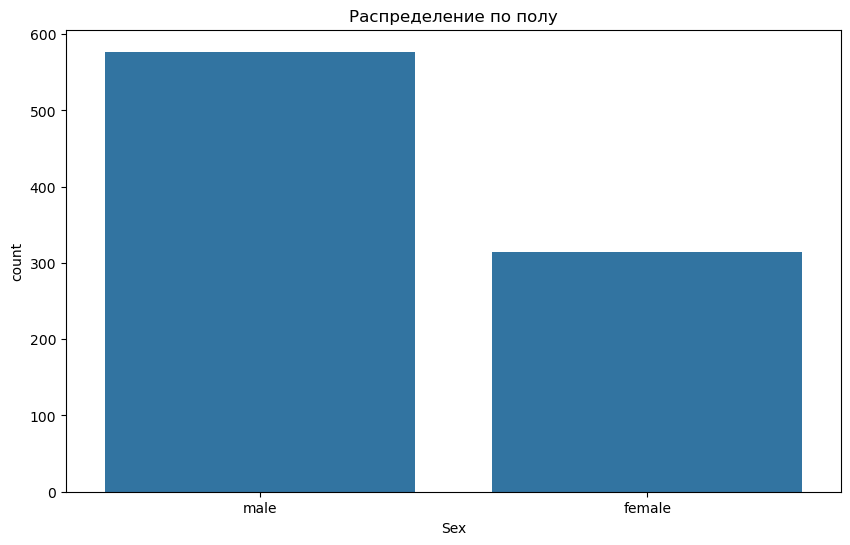

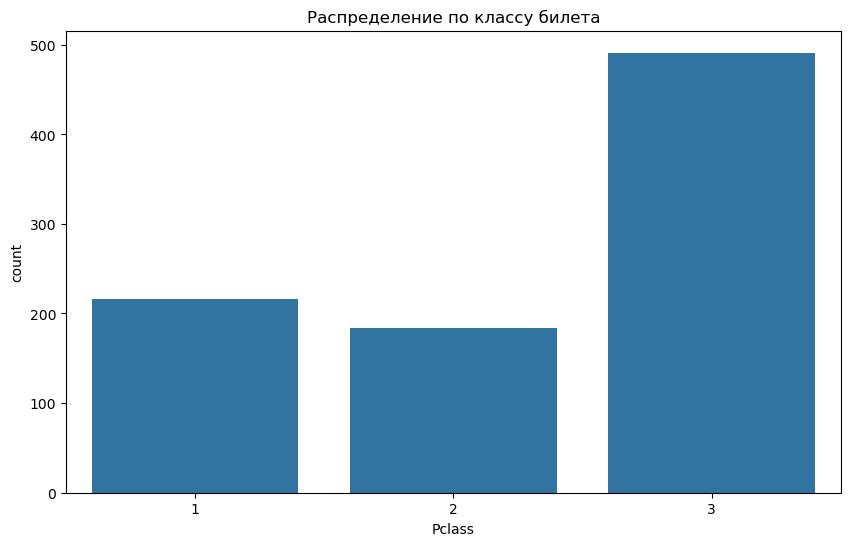

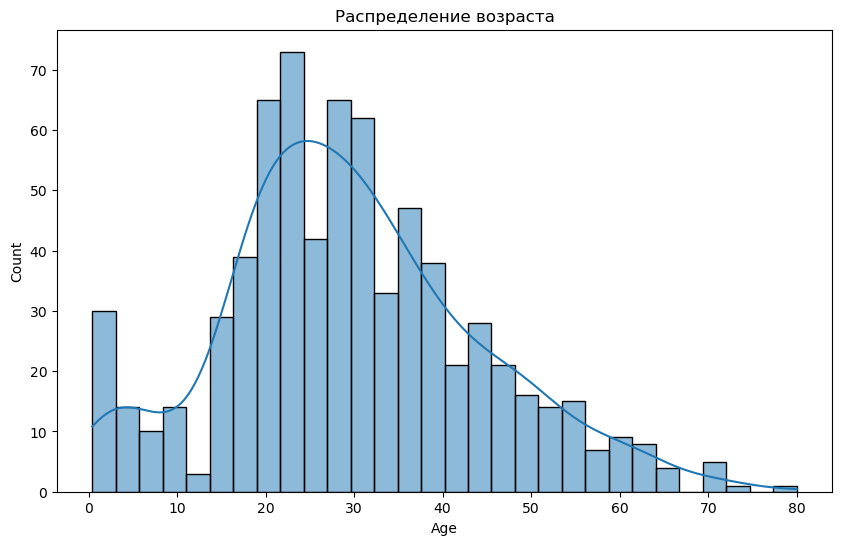

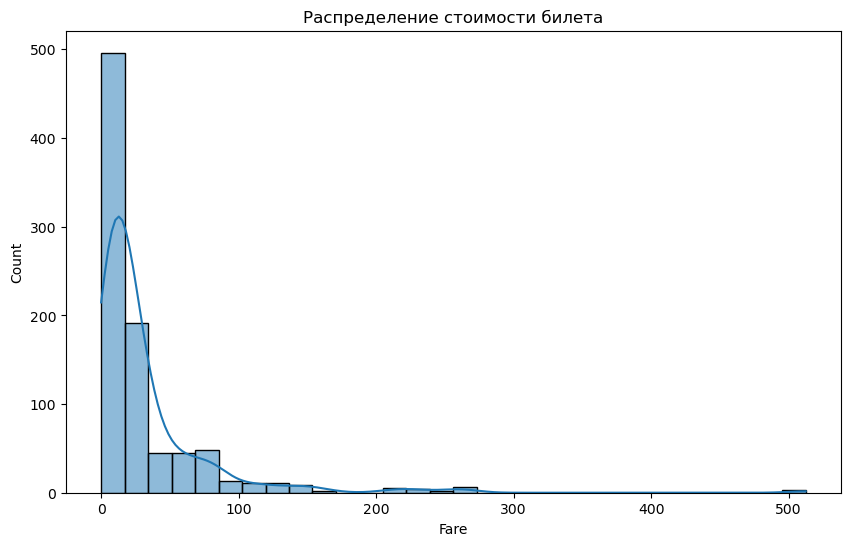

In [8]:
import matplotlib.pyplot as plt
import seaborn as s

df = pd.read_csv('info/train.csv')

plt.figure(figsize=(10, 6))
s.countplot(x='Sex', data=df)
plt.title('Распределение по полу')
plt.show()

plt.figure(figsize=(10, 6))
s.countplot(x='Pclass', data=df)
plt.title('Распределение по классу билета')
plt.show()

plt.figure(figsize=(10, 6))
s.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Распределение возраста')
plt.show()

plt.figure(figsize=(10, 6))
s.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Распределение стоимости билета')
plt.show()


# Задание 5: Проверка гипотез
Сгенерируйте два шкалированных ряда данных и проверьте статистически значимые различия между ними с использованием t-теста. Визуализируйте эти данные и результаты своего анализа.

T-статистика: 19.448650285047485
P-значение: 8.908959353672071e-68


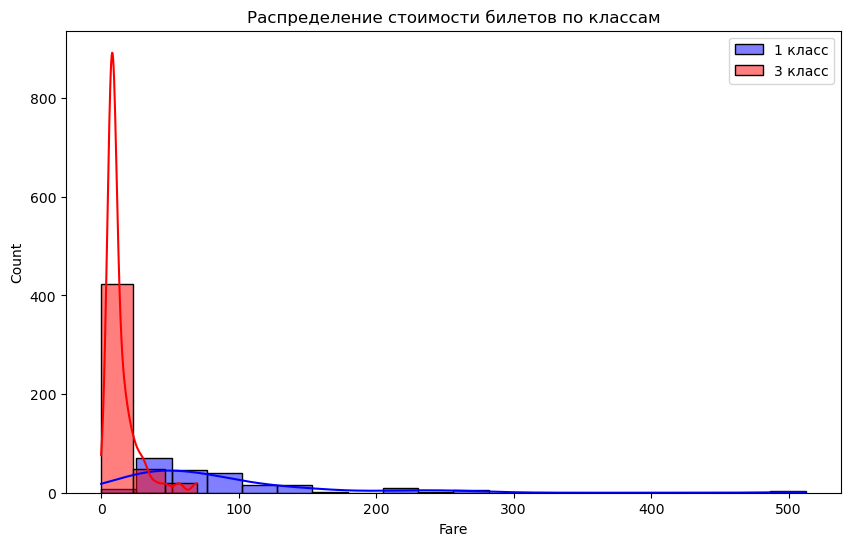

In [12]:
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_csv('info/train.csv')

group1 = df[df['Pclass'] == 1]['Fare'].dropna()
group2 = df[df['Pclass'] == 3]['Fare'].dropna()

t_stat, p_value = ttest_ind(group1, group2)

print(f'T-статистика: {t_stat}')
print(f'P-значение: {p_value}')

plt.figure(figsize=(10, 6))
s.histplot(group1, color='blue', bins=20, label='1 класс', kde=True)
s.histplot(group2, color='red', bins=3, label='3 класс', kde=True)
plt.title('Распределение стоимости билетов по классам')
plt.legend()
plt.show()